# Bibliotecas

In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


# Importa Dados

## Tabela Unificada

In [122]:
df = pd.read_csv("dataset/tabela_unificada_auxiliar.csv")
df.head()


,id_cliente,idade,salario,numero_dependentes,qtd_emprestimos_real_estate,qtd_emprestimos_other,atrasos_30_59_dias,atrasos_60_89_dias,atrasos_acima_90_dias,uso_linha_credito,...,faixa_endividamento,faixa_atraso_pagamento,status_inadimplencia,historico_atrasos,faixa_atraso_atingida,quartil_idade,decil_salario,quartil_dependentes,quartil_uso_credito,quartil_taxa_endividamento
0,33474,21,NaN,0,0,1,0,0,0,1.000000,...,não informado,sem atraso,não,não,não atrasou,1,1,1,4,1
1,24483,21,NaN,0,não informado,não informado,98,98,98,1.000000,...,não informado,extremo,não,sim,atraso acima 90 dias,1,1,1,4,1
2,2303,21,NaN,0,0,1,0,0,0,0.974392,...,não informado,sem atraso,não,não,não atrasou,1,2,2,4,1
3,28122,21,NaN,0,não informado,não informado,0,0,0,1.000000,...,não informado,sem atraso,não,não,não atrasou,1,1,2,4,1
4,3108,21,NaN,0,não informado,não informado,98,98,98,1.000000,...,não informado,extremo,não,sim,atraso acima 90 dias,1,1,2,4,1


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36000 entries, 0 to 35999
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id_cliente                   36000 non-null  int64  
 1   idade                        36000 non-null  int64  
 2   salario                      28801 non-null  float64
 3   numero_dependentes           36000 non-null  int64  
 4   qtd_emprestimos_real_estate  36000 non-null  object 
 5   qtd_emprestimos_other        36000 non-null  object 
 6   atrasos_30_59_dias           36000 non-null  int64  
 7   atrasos_60_89_dias           36000 non-null  int64  
 8   atrasos_acima_90_dias        36000 non-null  int64  
 9   uso_linha_credito            36000 non-null  float64
 10  taxa_endividamento           28423 non-null  float64
 11  indicador_inadimplencia      36000 non-null  int64  
 12  faixa_etaria                 36000 non-null  object 
 13  faixa_salarial  

## Variáveis Dummy

In [124]:
df_dummy = pd.read_csv("dataset/tabela_variavel_dummy.csv")
df_dummy.head()

,id_cliente,default_flag,dummy_idade_q1,dummy_idade_q2,dummy_idade_q3,dummy_idade_q4,dummy_salario_d1,dummy_salario_d2,dummy_salario_d3,dummy_salario_d4,...,dummy_uso_credito_q1,dummy_uso_credito_q2,dummy_uso_credito_q3,dummy_uso_credito_q4,dummy_endividamento_q1,dummy_endividamento_q2,dummy_endividamento_q3,dummy_endividamento_q4,dummy_historico_atrasos_sim,dummy_historico_atrasos_nao
0,14112,0,1,0,0,0,1,0,0,0,...,0,0,0,1,1,0,0,0,0,1
1,10501,0,1,0,0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,1
2,16887,0,1,0,0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,1
3,11111,0,1,0,0,0,1,0,0,0,...,0,0,0,1,1,0,0,0,0,1
4,6325,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1


In [125]:
df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36000 entries, 0 to 35999
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   id_cliente                   36000 non-null  int64
 1   default_flag                 36000 non-null  int64
 2   dummy_idade_q1               36000 non-null  int64
 3   dummy_idade_q2               36000 non-null  int64
 4   dummy_idade_q3               36000 non-null  int64
 5   dummy_idade_q4               36000 non-null  int64
 6   dummy_salario_d1             36000 non-null  int64
 7   dummy_salario_d2             36000 non-null  int64
 8   dummy_salario_d3             36000 non-null  int64
 9   dummy_salario_d4             36000 non-null  int64
 10  dummy_salario_d5             36000 non-null  int64
 11  dummy_salario_d6             36000 non-null  int64
 12  dummy_salario_d7             36000 non-null  int64
 13  dummy_salario_d8             36000 non-null  i

# Análise Exploratória de Dados (EDA)

In [126]:
colunas_numericas = ['idade', 'salario', 'numero_dependentes','qtd_emprestimos_real_estate','qtd_emprestimos_other','uso_linha_credito', 'taxa_endividamento',
                     'atrasos_30_59_dias', 'atrasos_60_89_dias', 'atrasos_acima_90_dias',] 

# Filtra o DataFrame para incluir apenas as colunas numéricas de interesse
df_numeric = df[colunas_numericas].copy()


# Calcula estatísticas descritivas
descritivas = df_numeric.describe().transpose()

descritivas = descritivas.rename(columns={
    'mean': 'media',
    '50%': 'mediana', 
    'min': 'minimo',
    'max': 'maximo',
    'std': 'desvio_padrao',
    'count': 'contagem_validos' 
})

# Adiciona contagem de nulos
descritivas['contagem_nulos_original'] = df[colunas_numericas].isnull().sum()


print(descritivas[['media', 'mediana', 'minimo', 'maximo', 'desvio_padrao', 'contagem_nulos_original']])

                             media      mediana  minimo     maximo  \
idade                    52.417417    52.000000    21.0      109.0   
salario                6675.052047  5400.000000     0.0  1560100.0   
numero_dependentes        0.738222     0.000000     0.0       13.0   
uso_linha_credito         5.807040     0.149655     0.0    22000.0   
taxa_endividamento        4.793712     0.290967     0.0     5696.0   
atrasos_30_59_dias        0.419278     0.000000     0.0       98.0   
atrasos_60_89_dias        0.237861     0.000000     0.0       98.0   
atrasos_acima_90_dias     0.260806     0.000000     0.0       98.0   

                       desvio_padrao  contagem_nulos_original  
idade                      14.791331                        0  
salario                 12961.778477                     7199  
numero_dependentes          1.110608                        0  
uso_linha_credito         223.407144                        0  
taxa_endividamento         90.721057             

## Gráficos de Distribuição

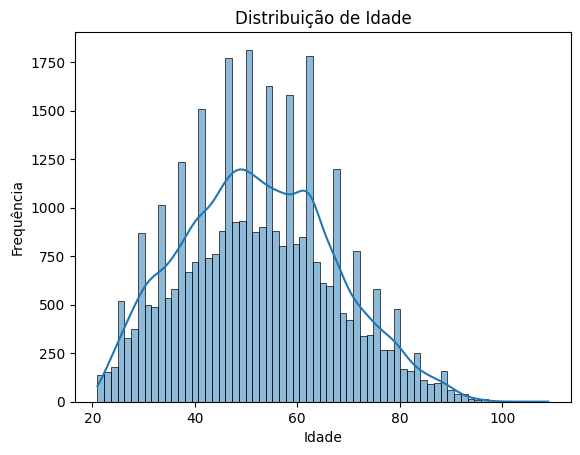

In [127]:
# Histograma para ver a distribuição de idade
sns.histplot(df['idade'], kde=True)
plt.title('Distribuição de Idade')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

count    36000.000000
mean        52.417417
std         14.791331
min         21.000000
25%         41.000000
50%         52.000000
75%         63.000000
max        109.000000
Name: idade, dtype: float64


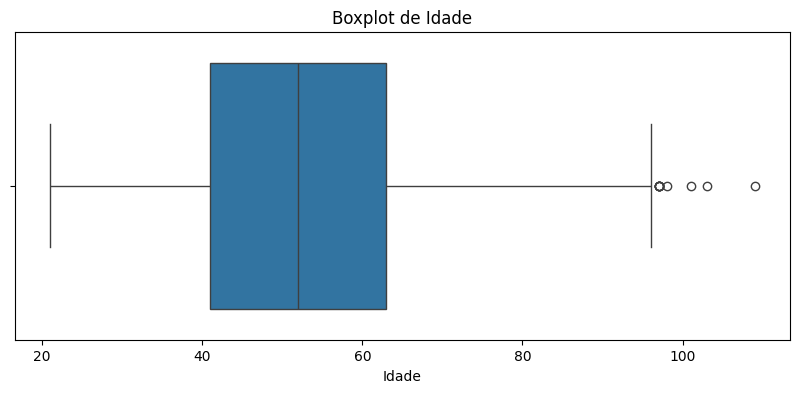

In [128]:
# Boxplot para visualizar mediana, quartis e outliers

print(df['idade'].describe())
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['idade'])
plt.title('Boxplot de Idade')
plt.xlabel('Idade')
plt.show()

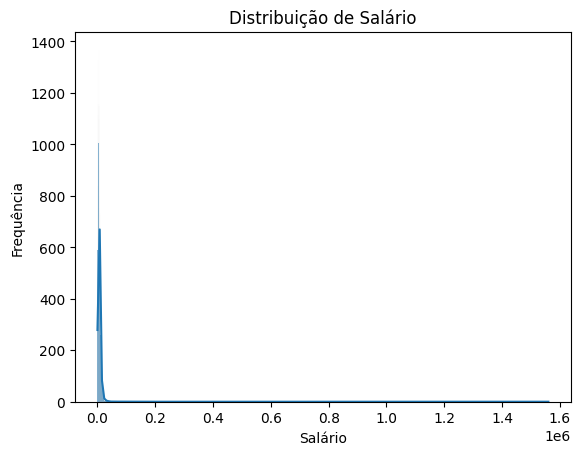

In [129]:
# Histograma para ver a distribuição de salario
sns.histplot(df['salario'], kde=True)
plt.title('Distribuição de Salário')
plt.xlabel('Salário')
plt.ylabel('Frequência')
plt.show()

count    2.880100e+04
mean     6.675052e+03
std      1.296178e+04
min      0.000000e+00
25%      3.400000e+03
50%      5.400000e+03
75%      8.300000e+03
max      1.560100e+06
Name: salario, dtype: float64


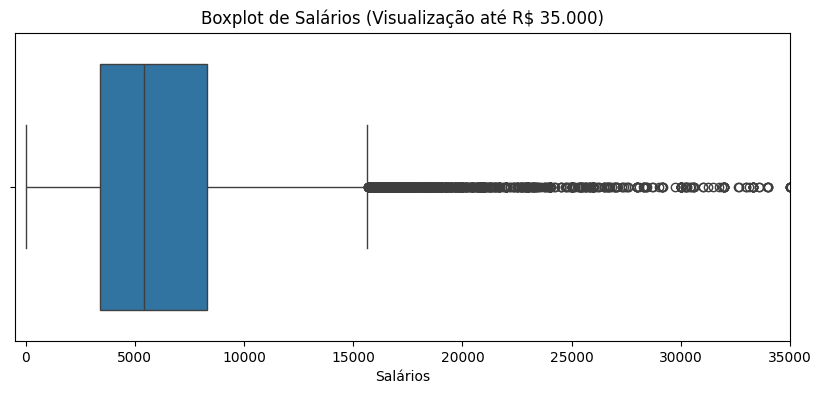

In [130]:
# Boxplot para visualizar mediana, quartis e outliers
plt.figure(figsize=(10, 4))
print(df['salario'].describe())
sns.boxplot(x=df['salario'])
plt.title('Boxplot de Salários (Visualização até R$ 35.000)')
plt.xlabel('Salários')
limite_visualizacao = 35000
plt.xlim(-500, limite_visualizacao) 
plt.show()

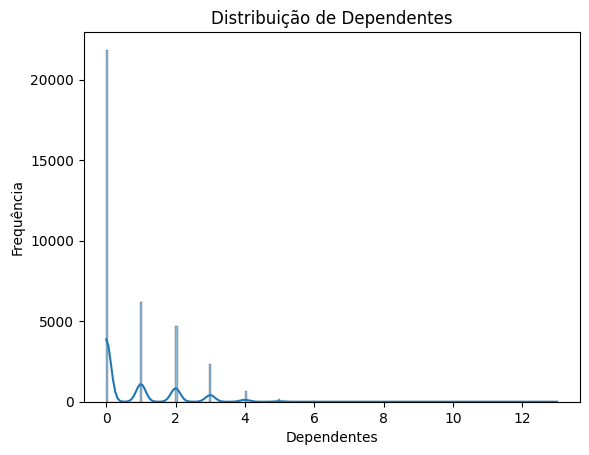

In [131]:
# Histograma para ver a distribuição de dependentes
sns.histplot(df['numero_dependentes'], kde=True)
plt.title('Distribuição de Dependentes')
plt.xlabel('Dependentes')
plt.ylabel('Frequência')
plt.show()

count    36000.000000
mean         0.738222
std          1.110608
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         13.000000
Name: numero_dependentes, dtype: float64


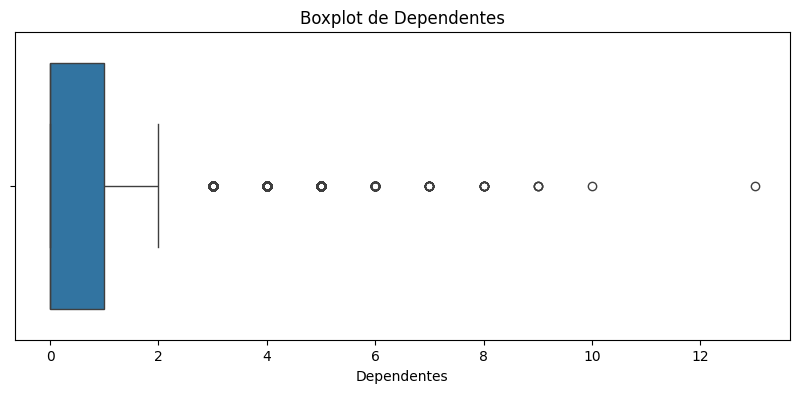

In [132]:
plt.figure(figsize=(10, 4))
print(df['numero_dependentes'].describe())
sns.boxplot(x=df['numero_dependentes'])
plt.title('Boxplot de Dependentes')
plt.xlabel('Dependentes')
plt.show()

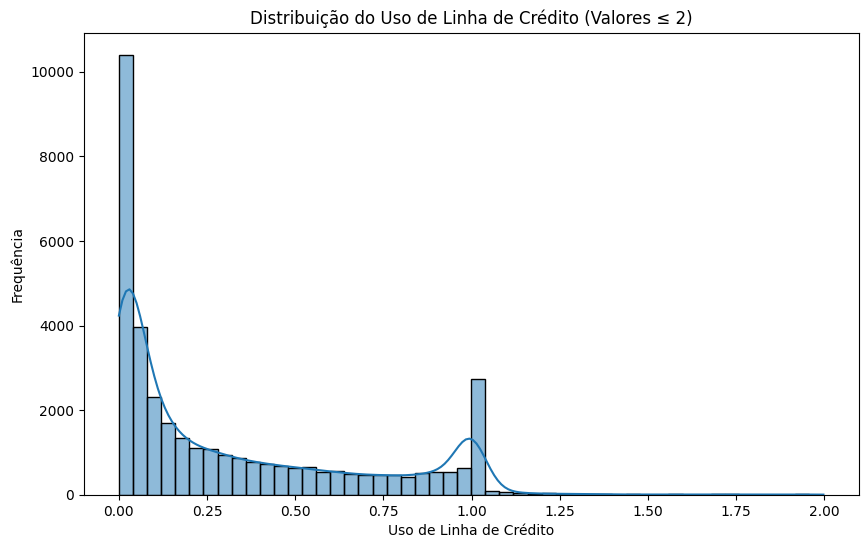

In [133]:
# zoom na parte principal da distribuição
# limite baseado nos quartis (limite superior 1.327)

limite_visualizacao = 2 
dados_para_zoom = df[df['uso_linha_credito'] <= limite_visualizacao]['uso_linha_credito'].dropna()

plt.figure(figsize=(10, 6))
sns.histplot(dados_para_zoom, bins=50, kde=True) # bins para esta visualização
plt.title(f'Distribuição do Uso de Linha de Crédito (Valores ≤ {limite_visualizacao})')
plt.xlabel('Uso de Linha de Crédito')
plt.ylabel('Frequência')
plt.show()

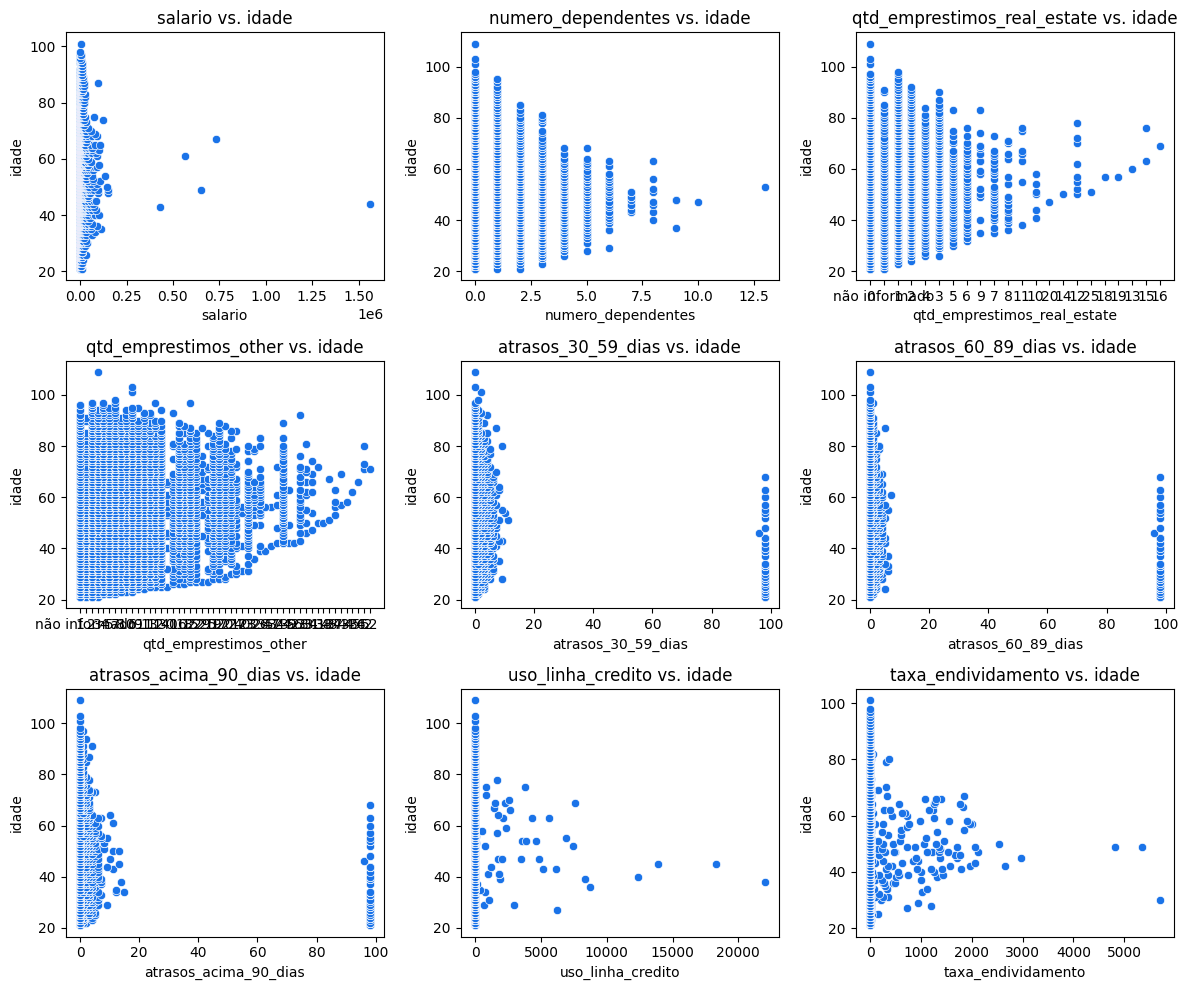

In [134]:
# características gerais comparadas com a idade
variaveis = ['salario', 'numero_dependentes', 'qtd_emprestimos_real_estate', 'qtd_emprestimos_other',
                   'atrasos_30_59_dias', 'atrasos_60_89_dias', 'atrasos_acima_90_dias', 'uso_linha_credito','taxa_endividamento']

# gráficos de dispersão para cada característica em relação aos streams
plt.figure(figsize=(12, 10))

# loop para criar os gráficos

for i, coluna in enumerate(variaveis, 1):
    plt.subplot(3, 3, i)  # Organiza os gráficos em uma grade 3x3
    sns.scatterplot(x=df[coluna], y=df['idade'], color='#1A73E8')
    plt.title(f'{coluna} vs. idade')
    plt.xlabel(coluna)
    plt.ylabel('idade')

plt.tight_layout()
plt.show()

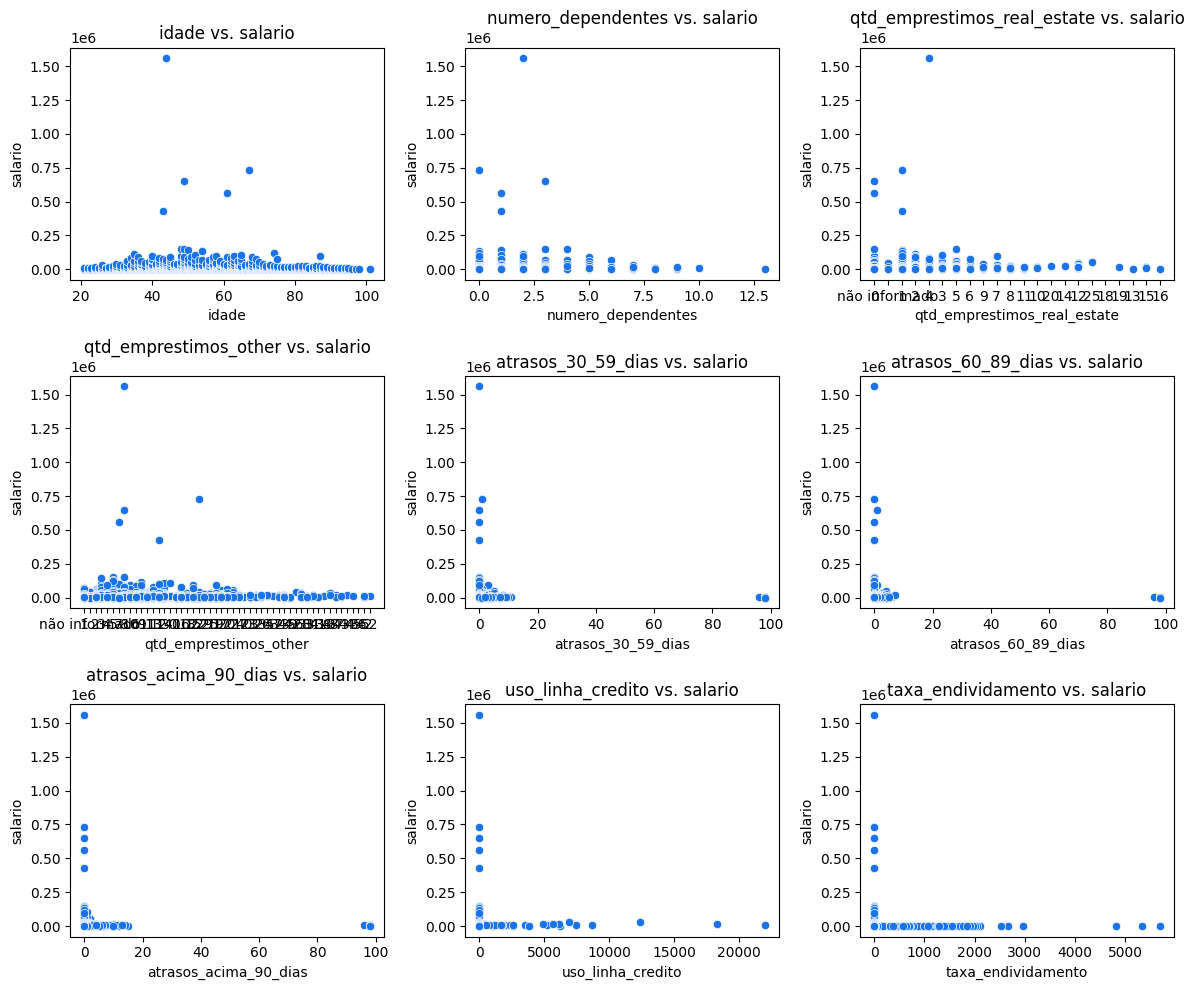

In [135]:
# características gerais comparadas com o salário
variaveis = ['idade', 'numero_dependentes', 'qtd_emprestimos_real_estate', 'qtd_emprestimos_other',
                   'atrasos_30_59_dias', 'atrasos_60_89_dias', 'atrasos_acima_90_dias', 'uso_linha_credito','taxa_endividamento']

# gráficos de dispersão para cada característica em relação aos streams
plt.figure(figsize=(12, 10))

# loop para criar os gráficos

for i, coluna in enumerate(variaveis, 1):
    plt.subplot(3, 3, i)  # Organiza os gráficos em uma grade 3x3
    sns.scatterplot(x=df[coluna], y=df['salario'], color='#1A73E8')
    plt.title(f'{coluna} vs. salario')
    plt.xlabel(coluna)
    plt.ylabel('salario')

plt.tight_layout()
plt.show()

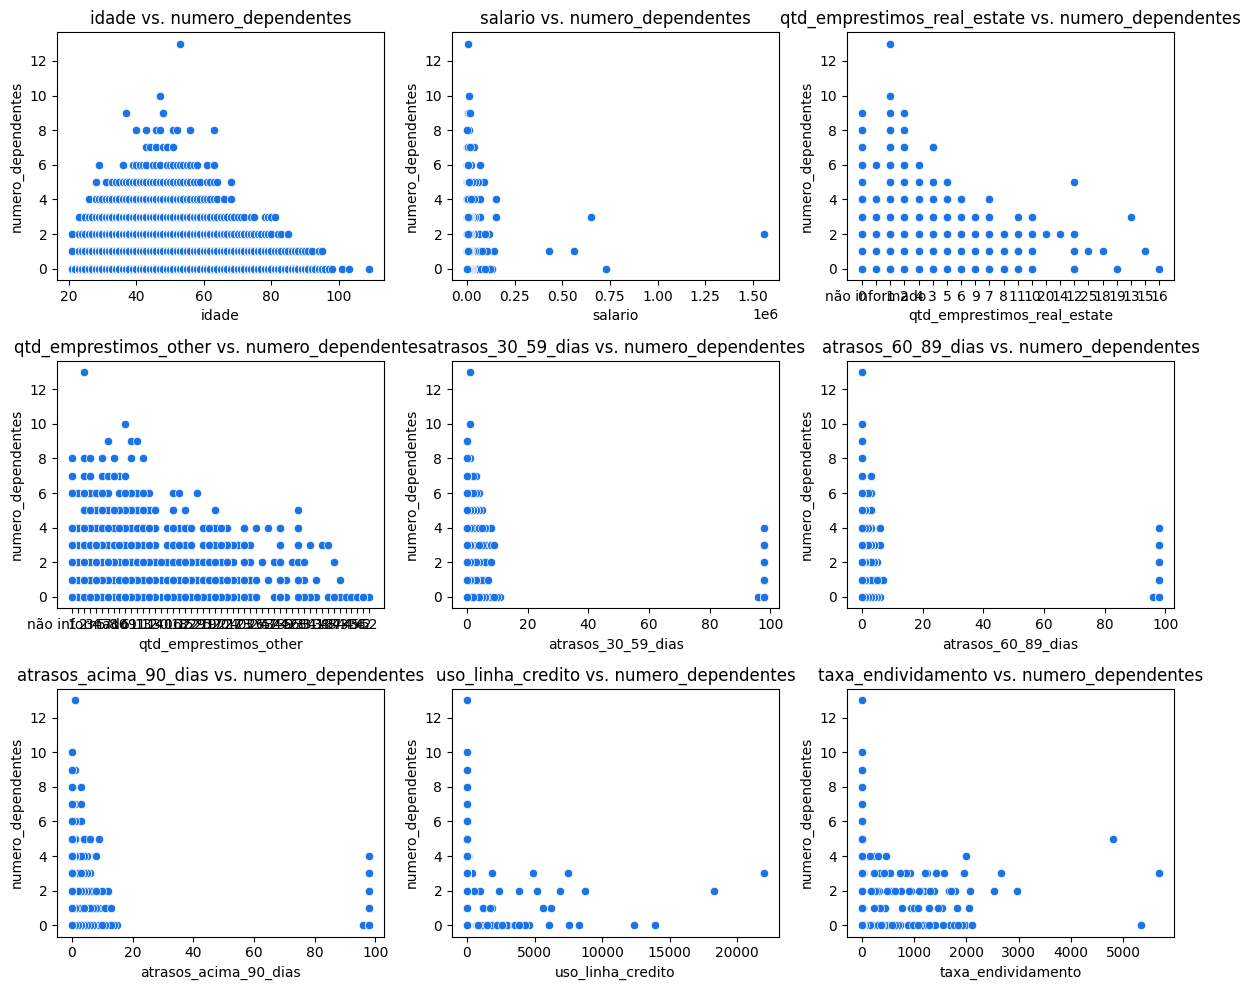

In [136]:
# características gerais comparadas com numero de dependentes
variaveis = ['idade', 'salario', 'qtd_emprestimos_real_estate', 'qtd_emprestimos_other',
                   'atrasos_30_59_dias', 'atrasos_60_89_dias', 'atrasos_acima_90_dias', 'uso_linha_credito','taxa_endividamento']

# gráficos de dispersão para cada característica em relação aos streams
plt.figure(figsize=(12, 10))

# loop para criar os gráficos

for i, coluna in enumerate(variaveis, 1):
    plt.subplot(3, 3, i)  # Organiza os gráficos em uma grade 3x3
    sns.scatterplot(x=df[coluna], y=df['numero_dependentes'], color='#1A73E8')
    plt.title(f'{coluna} vs. numero_dependentes')
    plt.xlabel(coluna)
    plt.ylabel('numero_dependentes')

plt.tight_layout()
plt.show()

# Matriz de Confusão para o Score Manual Simplificado

Avaliando a perfornace dos scores criados via SQL usando uma matriz de confusão.
 
A ideia é criar uma pontuação de risco (0 a 6) para cada cliente, onde cada ponto é adicionado se o cliente pertencer a uma categoria de alto risco identificada na "Análise de Risco Relativo" anterior.
 
1.  **Ponto de Corte 3:** Clientes com `pontuacao_risco >= 3` serão classificados como potenciais inadimplentes.
2.  **Ponto de Corte 4:** Clientes com `pontuacao_risco >= 4` serão classificados como potenciais inadimplentes.

**Quartis com Maior Risco Relativo**

dummy_idade_q1 ⇒ RR = 2,46 (jovens com maior risco)  

dummy_salario_d4 ⇒ RR = 2,00 (faixa de renda com maior risco)  

dummy_dependentes_q4 ⇒ RR = 1,48 (risco elevado)  

dummy_uso_credito_q4 ⇒ RR = 44,65 (forte risco)  

dummy_endividamento_q4 ⇒ RR = 1,52 (risco elevado)  

dummy_historico_atrasos_sim RR = 4,93 (risco significativo)

## Matriz de Confusão com Ponto de Corte 3

In [137]:
# para renomear as colunas
# df.rename(columns={'nome_da_coluna_antiga': 'nome_da_coluna_nova'}, inplace=True)

# une as tabelas - unificada + dummy
df = pd.merge(df, df_dummy, on='id_cliente', how='inner')

# Definir as variáveis
variaveis = [
    'dummy_idade_q1',
    'dummy_salario_d4',
    'dummy_dependentes_q4',
    'dummy_uso_credito_q4',  
    'dummy_endividamento_q4',  
    'dummy_historico_atrasos_sim'
]

#df[variaveis] = df[variaveis].fillna('')
df['pontuacao_risco'] = df[variaveis].sum(axis=1)

# Atribuir previsão de inadimplência com base na pontuação de risco (exemplo: se pontuação >= 4, previsão = 1)
df['previsao_inadimplencia'] = df['pontuacao_risco'].apply(lambda x: 1 if x >= 3 else 0)

# Definir a variável real (indicador de inadimplência) e a variável prevista (previsão de inadimplência)
y_real = df['indicador_inadimplencia']
y_previsto = df['previsao_inadimplencia']

# matriz de confusão
matriz_confusao = confusion_matrix(y_real, y_previsto)

# mostra matriz de confusão
print(matriz_confusao)


[[29906  5411]
 [  162   521]]


In [138]:
# Calcular a matriz de confusão
tn, fp, fn, tp = confusion_matrix(y_real, y_previsto).ravel()

# Calcular as métricas
acuracia = accuracy_score(y_real, y_previsto)
precisao = precision_score(y_real, y_previsto)
recall = recall_score(y_real, y_previsto)
f1 = f1_score(y_real, y_previsto)

# Calcular a especificidade
especificidade = tn / (tn + fp)

# Exibir as métricas
print(f"Acurácia: {acuracia:.4f}")
print(f"Precisão: {precisao:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"Especificidade: {especificidade:.4f}")


Acurácia: 0.8452
Precisão: 0.0878
Recall: 0.7628
F1-score: 0.1575
Especificidade: 0.8468


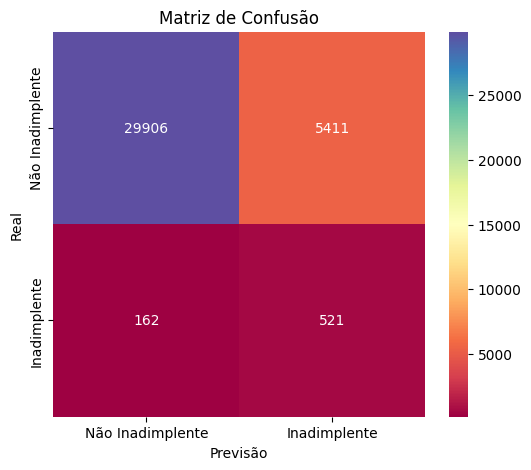

In [139]:
# Gerar a matriz de confusão
matriz_confusao = confusion_matrix(y_real, y_previsto)

# Criar o gráfico
plt.figure(figsize=(6,5))
sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap='Spectral', xticklabels=['Não Inadimplente', 'Inadimplente'], yticklabels=['Não Inadimplente', 'Inadimplente'])

# Adicionar título e labels
plt.title('Matriz de Confusão')
plt.xlabel('Previsão')
plt.ylabel('Real')
plt.show()

## Matriz de Confusão com Ponto de Corte 4

In [140]:
# apenas quartis com alto risco
variaveis = [
    'dummy_idade_q1',
    'dummy_salario_d4',
    'dummy_dependentes_q4',
    'dummy_uso_credito_q4',  
    'dummy_endividamento_q4',  
    'dummy_historico_atrasos_sim'
]

# df[variaveis] = df[variaveis].fillna('')
df['pontuacao_risco'] = df[variaveis].sum(axis=1) # soma das variáveis dummy

# previsão de inadimplência com base na pontuação de risco (nesse caso >= 4 e indica a previsao positiva, ou seja  = 1)
df['previsao_inadimplencia'] = df['pontuacao_risco'].apply(lambda x: 1 if x >= 4 else 0)

# define a variável real (indicador de inadimplência) e a variável prevista (previsão de inadimplência)
y_real = df['indicador_inadimplencia']
y_previsto = df['previsao_inadimplencia']

# matriz de confusão
matriz_confusao = confusion_matrix(y_real, y_previsto)

# Exibir a matriz de confusão
print(matriz_confusao)


[[33757  1560]
 [  429   254]]


In [141]:
# Calcular a matriz de confusão
tn, fp, fn, tp = confusion_matrix(y_real, y_previsto).ravel()

# Calcular as métricas
acuracia = accuracy_score(y_real, y_previsto)
precisao = precision_score(y_real, y_previsto)
recall = recall_score(y_real, y_previsto)
f1 = f1_score(y_real, y_previsto)

# Calcular a especificidade
especificidade = tn / (tn + fp)

# Exibir as métricas
print(f"Acurácia: {acuracia:.4f}")
print(f"Precisão: {precisao:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"Especificidade: {especificidade:.4f}")


Acurácia: 0.9447
Precisão: 0.1400
Recall: 0.3719
F1-score: 0.2034
Especificidade: 0.9558


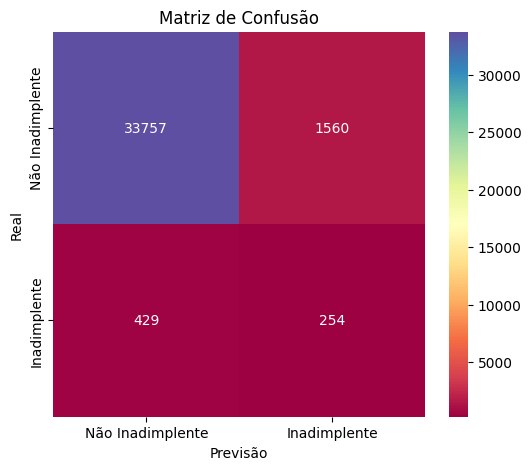

In [142]:
# Gerar a matriz de confusão
matriz_confusao = confusion_matrix(y_real, y_previsto)

# Criar o gráfico
plt.figure(figsize=(6,5))
sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap='Spectral', xticklabels=['Não Inadimplente', 'Inadimplente'], yticklabels=['Não Inadimplente', 'Inadimplente'])

# Adicionar título e labels
plt.title('Matriz de Confusão')
plt.xlabel('Previsão')
plt.ylabel('Real')
plt.show()


# Análise de Risco Relativo

## Risco Relativo por Quartil de Idade

In [143]:
print('Risco Relativo de Cada Quartil de Idade:')
for quartil in ['dummy_idade_q1', 'dummy_idade_q2', 'dummy_idade_q3', 'dummy_idade_q4']: 
    taxa_evento_quartil = df.loc[df[quartil] == 1, 'default_flag'].mean()
    taxa_evento_referencia = df['default_flag'].mean()  # taxa geral de default
    rr = taxa_evento_quartil / taxa_evento_referencia
    print(f'{quartil}: RR = {rr:.2f}')


print('Risco Relativo de Cada Quartil de Idade em Comparação aos Demais:')
quartis = ['dummy_idade_q1', 'dummy_idade_q2', 'dummy_idade_q3', 'dummy_idade_q4']
for q in quartis:
    taxa_quartil = df.loc[df[q] == 1, 'default_flag'].mean()
    taxa_outros = df.loc[df[q] != 1, 'default_flag'].mean()
    rr = taxa_quartil / taxa_outros
    print(f'{q}: RR em relação aos demais = {rr:.2f}')


Risco Relativo de Cada Quartil de Idade:
dummy_idade_q1: RR = 1.80
dummy_idade_q2: RR = 1.20
dummy_idade_q3: RR = 0.71
dummy_idade_q4: RR = 0.29
Risco Relativo de Cada Quartil de Idade em Comparação aos Demais:
dummy_idade_q1: RR em relação aos demais = 2.46
dummy_idade_q2: RR em relação aos demais = 1.29
dummy_idade_q3: RR em relação aos demais = 0.65
dummy_idade_q4: RR em relação aos demais = 0.23


## Risco Relativo por Decil de Salário

In [144]:
print('Risco Relativo de Cada Decil de Salários:')
decil_salario = [
    'dummy_salario_d1', 'dummy_salario_d2', 'dummy_salario_d3',
    'dummy_salario_d4', 'dummy_salario_d5', 'dummy_salario_d6',
    'dummy_salario_d7', 'dummy_salario_d8', 'dummy_salario_d9',
    'dummy_salario_d10'
]

taxa_evento_referencia = df['default_flag'].mean()

for decil in decil_salario:
    taxa_evento_decil = df.loc[df[decil] == 1, 'default_flag'].mean()
    rr = taxa_evento_decil / taxa_evento_referencia
    print(f'{decil}: RR = {rr:.2f}')


print('Risco Relativo de Cada Decil de Salários em Comparação aos Demais:')
quartis = [
    'dummy_salario_d1', 'dummy_salario_d2', 'dummy_salario_d3',
    'dummy_salario_d4', 'dummy_salario_d5', 'dummy_salario_d6',
    'dummy_salario_d7', 'dummy_salario_d8', 'dummy_salario_d9',
    'dummy_salario_d10'
]
for q in quartis:
    taxa_quartil = df.loc[df[q] == 1, 'default_flag'].mean()
    taxa_outros = df.loc[df[q] != 1, 'default_flag'].mean()
    rr = taxa_quartil / taxa_outros
    print(f'{q}: RR em relação aos demais = {rr:.2f}')


Risco Relativo de Cada Decil de Salários:
dummy_salario_d1: RR = 1.02
dummy_salario_d2: RR = 0.83
dummy_salario_d3: RR = 1.46
dummy_salario_d4: RR = 1.83
dummy_salario_d5: RR = 1.27
dummy_salario_d6: RR = 1.10
dummy_salario_d7: RR = 0.98
dummy_salario_d8: RR = 0.78
dummy_salario_d9: RR = 0.40
dummy_salario_d10: RR = 0.32
Risco Relativo de Cada Decil de Salários em Comparação aos Demais:
dummy_salario_d1: RR em relação aos demais = 1.03
dummy_salario_d2: RR em relação aos demais = 0.82
dummy_salario_d3: RR em relação aos demais = 1.54
dummy_salario_d4: RR em relação aos demais = 2.02
dummy_salario_d5: RR em relação aos demais = 1.31
dummy_salario_d6: RR em relação aos demais = 1.11
dummy_salario_d7: RR em relação aos demais = 0.98
dummy_salario_d8: RR em relação aos demais = 0.76
dummy_salario_d9: RR em relação aos demais = 0.37
dummy_salario_d10: RR em relação aos demais = 0.30


## Risco Relativo por Quartil de Dependentes

In [145]:
print('Risco Relativo de Cada Quartil de Dependentes:')
for quartil in ['dummy_dependentes_q1', 'dummy_dependentes_q2', 'dummy_dependentes_q3', 'dummy_dependentes_q4']: 
    taxa_evento_quartil = df.loc[df[quartil] == 1, 'default_flag'].mean()
    taxa_evento_referencia = df['default_flag'].mean()  # taxa geral de default
    rr = taxa_evento_quartil / taxa_evento_referencia
    print(f'{quartil}: RR = {rr:.2f}')


print('Risco Relativo de Cada Quartil de Dependentes em Comparação aos Demais:')
quartis = ['dummy_dependentes_q1', 'dummy_dependentes_q2', 'dummy_dependentes_q3', 'dummy_dependentes_q4']
for q in quartis:
    taxa_quartil = df.loc[df[q] == 1, 'default_flag'].mean()
    taxa_outros = df.loc[df[q] != 1, 'default_flag'].mean()
    rr = taxa_quartil / taxa_outros
    print(f'{q}: RR em relação aos demais = {rr:.2f}')

Risco Relativo de Cada Quartil de Dependentes:
dummy_dependentes_q1: RR = 0.90
dummy_dependentes_q2: RR = 0.85
dummy_dependentes_q3: RR = 0.93
dummy_dependentes_q4: RR = 1.33
Risco Relativo de Cada Quartil de Dependentes em Comparação aos Demais:
dummy_dependentes_q1: RR em relação aos demais = 0.87
dummy_dependentes_q2: RR em relação aos demais = 0.81
dummy_dependentes_q3: RR em relação aos demais = 0.90
dummy_dependentes_q4: RR em relação aos demais = 1.49


## Risco Relativo por Quartil de Uso de Crédito

In [146]:

print('Risco Relativo de Cada Quartil de Uso de Crédito:')
for quartil in ['dummy_uso_credito_q1', 'dummy_uso_credito_q2', 'dummy_uso_credito_q3', 'dummy_uso_credito_q4']: 
    taxa_evento_quartil = df.loc[df[quartil] == 1, 'default_flag'].mean()
    taxa_evento_referencia = df['default_flag'].mean()  # taxa geral de default
    rr = taxa_evento_quartil / taxa_evento_referencia
    print(f'{quartil}: RR = {rr:.2f}')


print('Risco Relativo de Cada Quartil de Uso de Crédito em Comparação aos Demais:')
quartis = ['dummy_uso_credito_q1', 'dummy_uso_credito_q2', 'dummy_uso_credito_q3', 'dummy_uso_credito_q4']
for q in quartis:
    taxa_quartil = df.loc[df[q] == 1, 'default_flag'].mean()
    taxa_outros = df.loc[df[q] != 1, 'default_flag'].mean()
    rr = taxa_quartil / taxa_outros
    print(f'{q}: RR em relação aos demais = {rr:.2f}')

Risco Relativo de Cada Quartil de Uso de Crédito:
dummy_uso_credito_q1: RR = 0.05
dummy_uso_credito_q2: RR = 0.01
dummy_uso_credito_q3: RR = 0.20
dummy_uso_credito_q4: RR = 3.75
Risco Relativo de Cada Quartil de Uso de Crédito em Comparação aos Demais:
dummy_uso_credito_q1: RR em relação aos demais = 0.04
dummy_uso_credito_q2: RR em relação aos demais = 0.00
dummy_uso_credito_q3: RR em relação aos demais = 0.16
dummy_uso_credito_q4: RR em relação aos demais = 44.65


In [147]:

print('Risco Relativo de Cada Quartil de Taxa de Endividamento:')
for quartil in ['dummy_endividamento_q1', 'dummy_endividamento_q2', 'dummy_endividamento_q3', 'dummy_endividamento_q4']: 
    taxa_evento_quartil = df.loc[df[quartil] == 1, 'default_flag'].mean()
    taxa_evento_referencia = df['default_flag'].mean()  # taxa geral de default
    rr = taxa_evento_quartil / taxa_evento_referencia
    print(f'{quartil}: RR = {rr:.2f}')


print('Risco Relativo de Cada Quartil de Uso de Taxa de Endividamento:')
quartis = ['dummy_endividamento_q1', 'dummy_endividamento_q2', 'dummy_endividamento_q3', 'dummy_endividamento_q4']
for q in quartis:
    taxa_quartil = df.loc[df[q] == 1, 'default_flag'].mean()
    taxa_outros = df.loc[df[q] != 1, 'default_flag'].mean()
    rr = taxa_quartil / taxa_outros
    print(f'{q}: RR em relação aos demais = {rr:.2f}')

Risco Relativo de Cada Quartil de Taxa de Endividamento:
dummy_endividamento_q1: RR = 0.90
dummy_endividamento_q2: RR = 0.98
dummy_endividamento_q3: RR = 0.78
dummy_endividamento_q4: RR = 1.35
Risco Relativo de Cada Quartil de Uso de Taxa de Endividamento:
dummy_endividamento_q1: RR em relação aos demais = 0.87
dummy_endividamento_q2: RR em relação aos demais = 0.97
dummy_endividamento_q3: RR em relação aos demais = 0.73
dummy_endividamento_q4: RR em relação aos demais = 1.52


## Risco Relativo por Histórico de Atraso

In [148]:
# taxa geral de inadimplência na base
taxa_geral = df['default_flag'].mean()

colunas = ['dummy_historico_atrasos_sim', 'dummy_historico_atrasos_nao']

for col in colunas:
    taxa_col = df.loc[df[col] == 1, 'default_flag'].mean()
    rr = taxa_col / taxa_geral if taxa_geral != 0 else float('inf')
    print(f'{col}: RR em relação à média geral = {rr:.2f}')

dummy_historico_atrasos_sim: RR em relação à média geral = 4.93
dummy_historico_atrasos_nao: RR em relação à média geral = 0.00


In [149]:
df.columns

Index(['id_cliente', 'idade', 'salario', 'numero_dependentes',
       'qtd_emprestimos_real_estate', 'qtd_emprestimos_other',
       'atrasos_30_59_dias', 'atrasos_60_89_dias', 'atrasos_acima_90_dias',
       'uso_linha_credito', 'taxa_endividamento', 'indicador_inadimplencia',
       'faixa_etaria', 'faixa_salarial', 'faixa_dependentes',
       'faixa_uso_credito', 'faixa_endividamento', 'faixa_atraso_pagamento',
       'status_inadimplencia', 'historico_atrasos', 'faixa_atraso_atingida',
       'quartil_idade', 'decil_salario', 'quartil_dependentes',
       'quartil_uso_credito', 'quartil_taxa_endividamento', 'default_flag',
       'dummy_idade_q1', 'dummy_idade_q2', 'dummy_idade_q3', 'dummy_idade_q4',
       'dummy_salario_d1', 'dummy_salario_d2', 'dummy_salario_d3',
       'dummy_salario_d4', 'dummy_salario_d5', 'dummy_salario_d6',
       'dummy_salario_d7', 'dummy_salario_d8', 'dummy_salario_d9',
       'dummy_salario_d10', 'dummy_dependentes_q1', 'dummy_dependentes_q2',
       'd

# Regressão Logística com Todas as Variáveis

## Preparação dos Dados

In [150]:
# X: todas as colunas dummies, exceto a variável alvo
X = df[['dummy_idade_q1', 'dummy_idade_q2', 'dummy_idade_q3', 'dummy_idade_q4',
        'dummy_salario_d1', 'dummy_salario_d2', 'dummy_salario_d3',
        'dummy_salario_d4', 'dummy_salario_d5', 'dummy_salario_d6',
        'dummy_salario_d7', 'dummy_salario_d8', 'dummy_salario_d9',
        'dummy_salario_d10', 'dummy_dependentes_q1', 'dummy_dependentes_q2',
        'dummy_dependentes_q3', 'dummy_dependentes_q4', 'dummy_uso_credito_q1',
        'dummy_uso_credito_q2', 'dummy_uso_credito_q3', 'dummy_uso_credito_q4',
        'dummy_endividamento_q1', 'dummy_endividamento_q2',
        'dummy_endividamento_q3', 'dummy_endividamento_q4',
        'dummy_historico_atrasos_sim', 'dummy_historico_atrasos_nao']]

# Y: variável alvo
y = df['default_flag']

# dados divididos em conjuntos de treinamento e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Treinamento e Previsão

In [151]:
# treinamento do modelo
modelo = LogisticRegression(max_iter=1000, class_weight='balanced')
modelo.fit(X_train, y_train)

# faz as previsões
# y_pred = modelo.predict(X_test)
# y_proba = modelo.predict_proba(X_test)[:, 1]  # probabilidade de inadimplência (== 1)

#thresholds = np.arange(0.1, 1, 0.1)
#for t in thresholds:
#    y_pred_t = (modelo.predict_proba(X_test)[:,1] > t).astype(int)
#    f1_t = f1_score(y_test, y_pred_t)
#    print(f"Threshold: {t:.1f} - F1: {f1_t:.3f}")

cust_fp = 1 # falso positivo - acha que é inadimplente e não é
cust_fn = 5 # falso negativo - acha que não é inadimplente e é

thresholds = np.arange(0.0, 1.0, 0.01) # testando cortes para minimizar custo
custos = []

for t in thresholds:
    y_pred_t = (modelo.predict_proba(X_test)[:,1] > t).astype(int)
    cm = confusion_matrix(y_test, y_pred_t)
    tn, fp, fn, tp = cm.ravel()
    custo_total = fp * cust_fp + fn * cust_fn
    custos.append(custo_total)

idx_min = np.argmin(custos)
melhor_threshold = thresholds[idx_min]


# threshold = 0.8
y_pred = (modelo.predict_proba(X_test)[:, 1] > melhor_threshold).astype(int)
print(melhor_threshold) # qual o melhor threshold?
# y_pred = (modelo.predict_proba(X_test)[:, 1] > threshold).astype(int)

0.9


## Avaliação do Modelo

In [152]:
# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = cm.ravel()

# Acurácia
acuracia = accuracy_score(y_test, y_pred)

# Precisão
precisao = precision_score(y_test, y_pred)

# Recall
recall = recall_score(y_test, y_pred)

# F1 Score
f1 = f1_score(y_test, y_pred)

# AUC-ROC
roc_auc = roc_auc_score(y_test, modelo.predict_proba(X_test)[:, 1])

# Exibir resultados
print(f"Acurácia: {acuracia}")
print(f"Precisão: {precisao}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"AUC-ROC: {roc_auc}")
print(f"Matriz de Confusão:\n{cm}")


Acurácia: 0.9413888888888889
Precisão: 0.20916334661354583
Recall: 0.8076923076923077
F1 Score: 0.3322784810126582
AUC-ROC: 0.9650832335980851
Matriz de Confusão:
[[6673  397]
 [  25  105]]


Acurácia alta (94%) mas precisão baixa (20%), recall alto (81%) — significa que o modelo acerta bastante no geral, identifica bem os casos positivos (inadimplentes), mas também gera muitos falsos positivos (alertas errados). F1 é baixo (33%), mostrando que equilíbrio entre precisão e recall pode ser melhorado. Matriz de confusão confirma isso: muitos falsos positivos (397) e poucos falsos negativos (25).

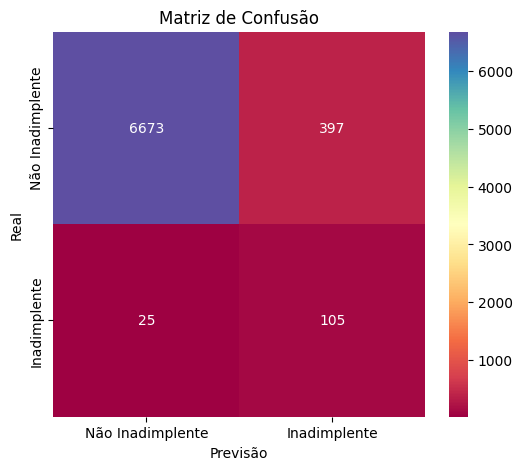

In [153]:
# Gerar a matriz de confusão
matriz_confusao = confusion_matrix(y_test, y_pred)

# Criar o gráfico
plt.figure(figsize=(6,5))
sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap='Spectral', xticklabels=['Não Inadimplente', 'Inadimplente'], yticklabels=['Não Inadimplente', 'Inadimplente'])

# Adicionar título e labels
plt.title('Matriz de Confusão')
plt.xlabel('Previsão')
plt.ylabel('Real')
plt.show()

In [154]:
coef = pd.DataFrame({'feature': X.columns, 'coef': modelo.coef_[0]})
coef = coef.sort_values(by='coef', ascending=False)
print(coef)

                        feature      coef
26  dummy_historico_atrasos_sim  3.488020
21         dummy_uso_credito_q4  2.058311
7              dummy_salario_d4  0.289507
4              dummy_salario_d1  0.282433
8              dummy_salario_d5  0.085278
6              dummy_salario_d3 -0.037614
11             dummy_salario_d8 -0.103287
9              dummy_salario_d6 -0.169386
0                dummy_idade_q1 -0.172241
20         dummy_uso_credito_q3 -0.180194
25       dummy_endividamento_q4 -0.191875
5              dummy_salario_d2 -0.219172
1                dummy_idade_q2 -0.253780
10             dummy_salario_d7 -0.296177
17         dummy_dependentes_q4 -0.296829
14         dummy_dependentes_q1 -0.410510
2                dummy_idade_q3 -0.451633
12             dummy_salario_d9 -0.477921
16         dummy_dependentes_q3 -0.479967
22       dummy_endividamento_q1 -0.486417
23       dummy_endividamento_q2 -0.488304
15         dummy_dependentes_q2 -0.538771
24       dummy_endividamento_q3 -0

| Feature                        | Coeficiente | Interpretação                               |
| ------------------------------ | ----------- | ------------------------------------------- |
| dummy\_historico\_atrasos\_sim | +3.488      | Histórico de atraso aumenta risco           |
| dummy\_uso\_credito\_q4        | +2.058      | Uso de crédito muito alto aumenta risco     |
| dummy\_salario\_d4             | +0.289      | Salário na categoria 4 aumenta risco (leve) |
| dummy\_uso\_credito\_q2        | -2.863      | Uso de crédito na categoria 2 diminui risco |
| dummy\_historico\_atrasos\_nao | -5.214      | Sem histórico de atraso reduz muito o risco |

Coeficiente alto positivo → feature fortalece a previsão de inadimplência.
Coeficiente alto negativo → feature reduz a chance de inadimplência.

In [155]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(modelo, X, y, cv=5, scoring='roc_auc')
print(f"AUC médio CV: {scores.mean():.3f}")

AUC médio CV: 0.943


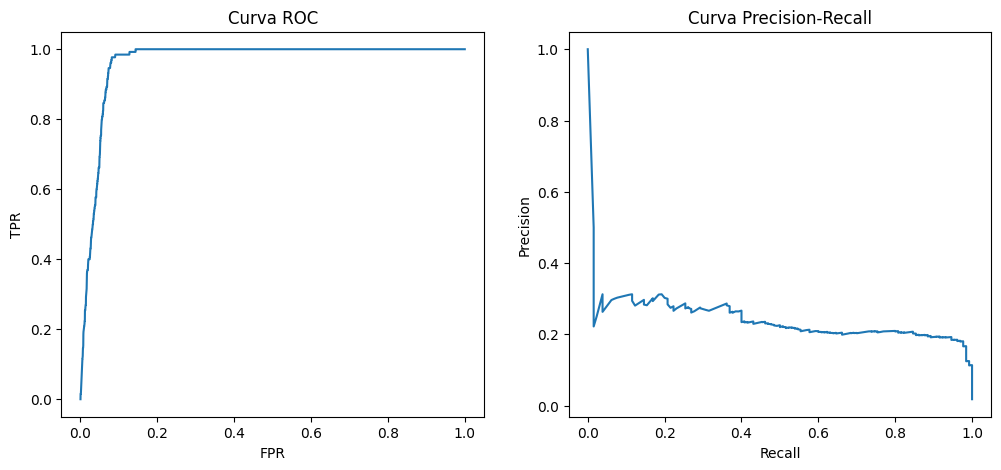

In [156]:
from sklearn.metrics import roc_curve, precision_recall_curve
import matplotlib.pyplot as plt

probs = modelo.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, probs)
precision, recall, _ = precision_recall_curve(y_test, probs)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Curva ROC')

plt.subplot(1,2,2)
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precision-Recall')

plt.show()


In [157]:
# rótulos reais
y_true = y_test

# probabilidades da classe positiva
y_scores = modelo.predict_proba(X_test)[:, 1]

# curva precision-recall
precisions, recalls, thresholds_pr = precision_recall_curve(y_true, y_scores)

# F1-score para cada threshold
f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-10)

# montar DataFrame (thresholds_pr tem 1 a menos que as curvas)
df_pr = pd.DataFrame({
    'threshold': thresholds_pr,
    'precision': precisions[:-1],
    'recall': recalls[:-1],
    'f1': f1_scores[:-1]
})

# mostrar top thresholds pelo F1
print(df_pr.sort_values(by='f1', ascending=False).head(10))


print(f"Threshold ótimo pelo custo: {melhor_threshold:.2f}")
print(df_pr[df_pr['threshold'].between(melhor_threshold - 0.01, melhor_threshold + 0.01)])


      threshold  precision    recall        f1
2174   0.892712   0.207547  0.846154  0.333333
2173   0.891912   0.206767  0.846154  0.332326
2191   0.900001   0.209163  0.807692  0.332278
2193   0.900275   0.209677  0.800000  0.332268
2190   0.898584   0.208748  0.807692  0.331754
2172   0.890908   0.205993  0.846154  0.331325
2171   0.890617   0.205607  0.846154  0.330827
2189   0.898457   0.207921  0.807692  0.330709
2170   0.890605   0.205224  0.846154  0.330330
2192   0.900126   0.208000  0.800000  0.330159
Threshold ótimo pelo custo: 0.90
      threshold  precision    recall        f1
2169   0.890289   0.204842  0.846154  0.329835
2170   0.890605   0.205224  0.846154  0.330330
2171   0.890617   0.205607  0.846154  0.330827
2172   0.890908   0.205993  0.846154  0.331325
2173   0.891912   0.206767  0.846154  0.332326
2174   0.892712   0.207547  0.846154  0.333333
2175   0.892965   0.205323  0.830769  0.329268
2176   0.893128   0.204198  0.823077  0.327217
2177   0.893639   0.204589 

# Regressão Logística Apenas Alto RR

Para a classificação das previsões de probabilidade neste modelo com 6 variáveis, utilizaremos um **threshold fixo de 0.8**. Este valor foi escolhido inicialmente para permitir uma comparação com o modelo que utiliza todas as variáveis dummy (que também foi avaliado preliminarmente com este mesmo threshold).

A intenção aqui é verificar se um modelo mais simples (com apenas 6 features de alto Risco Relativo) poderia ter uma performance competitiva. Como será visto na avaliação, e também em testes preliminares, o modelo com todas as variáveis dummy demonstrou uma performance superior. Por isso, a otimização de threshold mais aprofundada (baseada em custo) foi focada no modelo completo.

**Quartis com Maior Risco Relativo**

dummy_idade_q1 ⇒ RR = 2,46 (jovens com maior risco)  

dummy_salario_d4 ⇒ RR = 2,00 (faixa de renda com maior risco)  

dummy_dependentes_q4 ⇒ RR = 1,48 (risco elevado)  

dummy_uso_credito_q4 ⇒ RR = 44,65 (forte risco)  

dummy_endividamento_q4 ⇒ RR = 1,52 (risco elevado)  

dummy_historico_atrasos_sim RR = 4,93 (risco significativo)

## Preparação dos Dados

In [158]:
# X: todas as colunas dummies, exceto a variável alvo
X = df[['dummy_idade_q1', 'dummy_salario_d4', 'dummy_dependentes_q4', 'dummy_uso_credito_q4',
        'dummy_endividamento_q4', 'dummy_historico_atrasos_sim']]

# Y: variável alvo
y = df['default_flag']

# dados divididos em conjuntos de treinamento e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Treinamento e Previsão

In [159]:
# treinamento do modelo
modelo = LogisticRegression(max_iter=1000, class_weight='balanced')
modelo.fit(X_train, y_train)

# faz as previsões
# y_pred = modelo.predict(X_test)
# y_proba = modelo.predict_proba(X_test)[:, 1]  # probabilidade de inadimplência (== 1)

threshold = 0.8
y_pred = (modelo.predict_proba(X_test)[:, 1] > threshold).astype(int)

## Avaliação do Modelo

In [160]:
# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = cm.ravel()

# Acurácia
acuracia = accuracy_score(y_test, y_pred)

# Precisão
precisao = precision_score(y_test, y_pred)

# Recall
recall = recall_score(y_test, y_pred)

# F1 Score
f1 = f1_score(y_test, y_pred)

# AUC-ROC
roc_auc = roc_auc_score(y_test, modelo.predict_proba(X_test)[:, 1])

# Exibir resultados
print(f"Acurácia: {acuracia}")
print(f"Precisão: {precisao}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"AUC-ROC: {roc_auc}")
print(f"Matriz de Confusão:\n{cm}")


Acurácia: 0.9184722222222222
Precisão: 0.17862165963431786
Recall: 0.9769230769230769
F1 Score: 0.30202140309155767
AUC-ROC: 0.959023501251224
Matriz de Confusão:
[[6486  584]
 [   3  127]]
